# 🌦️ Daily Delhi Climate Time Series Dataset

## 🗂 Overview

This dataset contains **daily climate measurements for Delhi** over a period of four years (2013–2017). It is a **multivariate time series** where multiple weather-related variables are recorded for each day. The dataset is suitable for time series forecasting, multivariate analysis, and exploratory climate research.

---

## 📅 Temporal Structure

- **Frequency:** Daily
- **Time Span:** January 1, 2013 – December 31, 2017
- **Timestamps:** 1462 consecutive days with no missing dates

---

## 📊 Features (Variables)

| Column Name     | Description                                          | Data Type |
|------------------|------------------------------------------------------|-----------|
| `date`           | Date of observation (YYYY-MM-DD)                    | `object` (can be parsed as datetime) |
| `meantemp`       | Mean temperature (°C)                                | `float64` |
| `humidity`       | Mean relative humidity (%)                          | `float64` |
| `wind_speed`     | Mean wind speed (km/h)                               | `float64` |
| `meanpressure`   | Mean atmospheric pressure (millibars)                | `float64` |

> These climate indicators are interrelated and influenced by trend and daily patterns.

---

## 🔍 Use Cases

- **Weather forecasting** using statistical and deep learning models
- **Trend and seasonality decomposition**
- **Multivariate time series forecasting** (e.g., VAR, LSTM)
- **Correlation analysis** between climate variables
- **Environmental modeling** or anomaly detection

---

## 🛠 Suggested Preprocessing

- Convert `date` to `datetime` format
- Set `date` as index for time series modeling
- Normalize/standardize features for machine learning
- Perform stationarity checks (ADF, KPSS) before modeling

---

## 📦 Format

- **File Name:** `DailyDelhiClimateTrain.csv`
- **Rows:** 1462 (daily observations)
- **Columns:** 5 (1 date column, 4 numerical features)
- **Missing Values:** None

---

## 📘 Notes

- Time series modeling may require lagged variables or rolling windows.
- Ideal for testing **univariate vs. multivariate** forecasting approaches.


In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Loading the data

# Load data
df = pd.read_csv("data/DailyDelhiClimateTrain.csv")
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df.set_index("date", inplace=True)
# df = df.drop(columns=["Unnamed: 0"])


In [3]:
# printing the first 5 rows
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


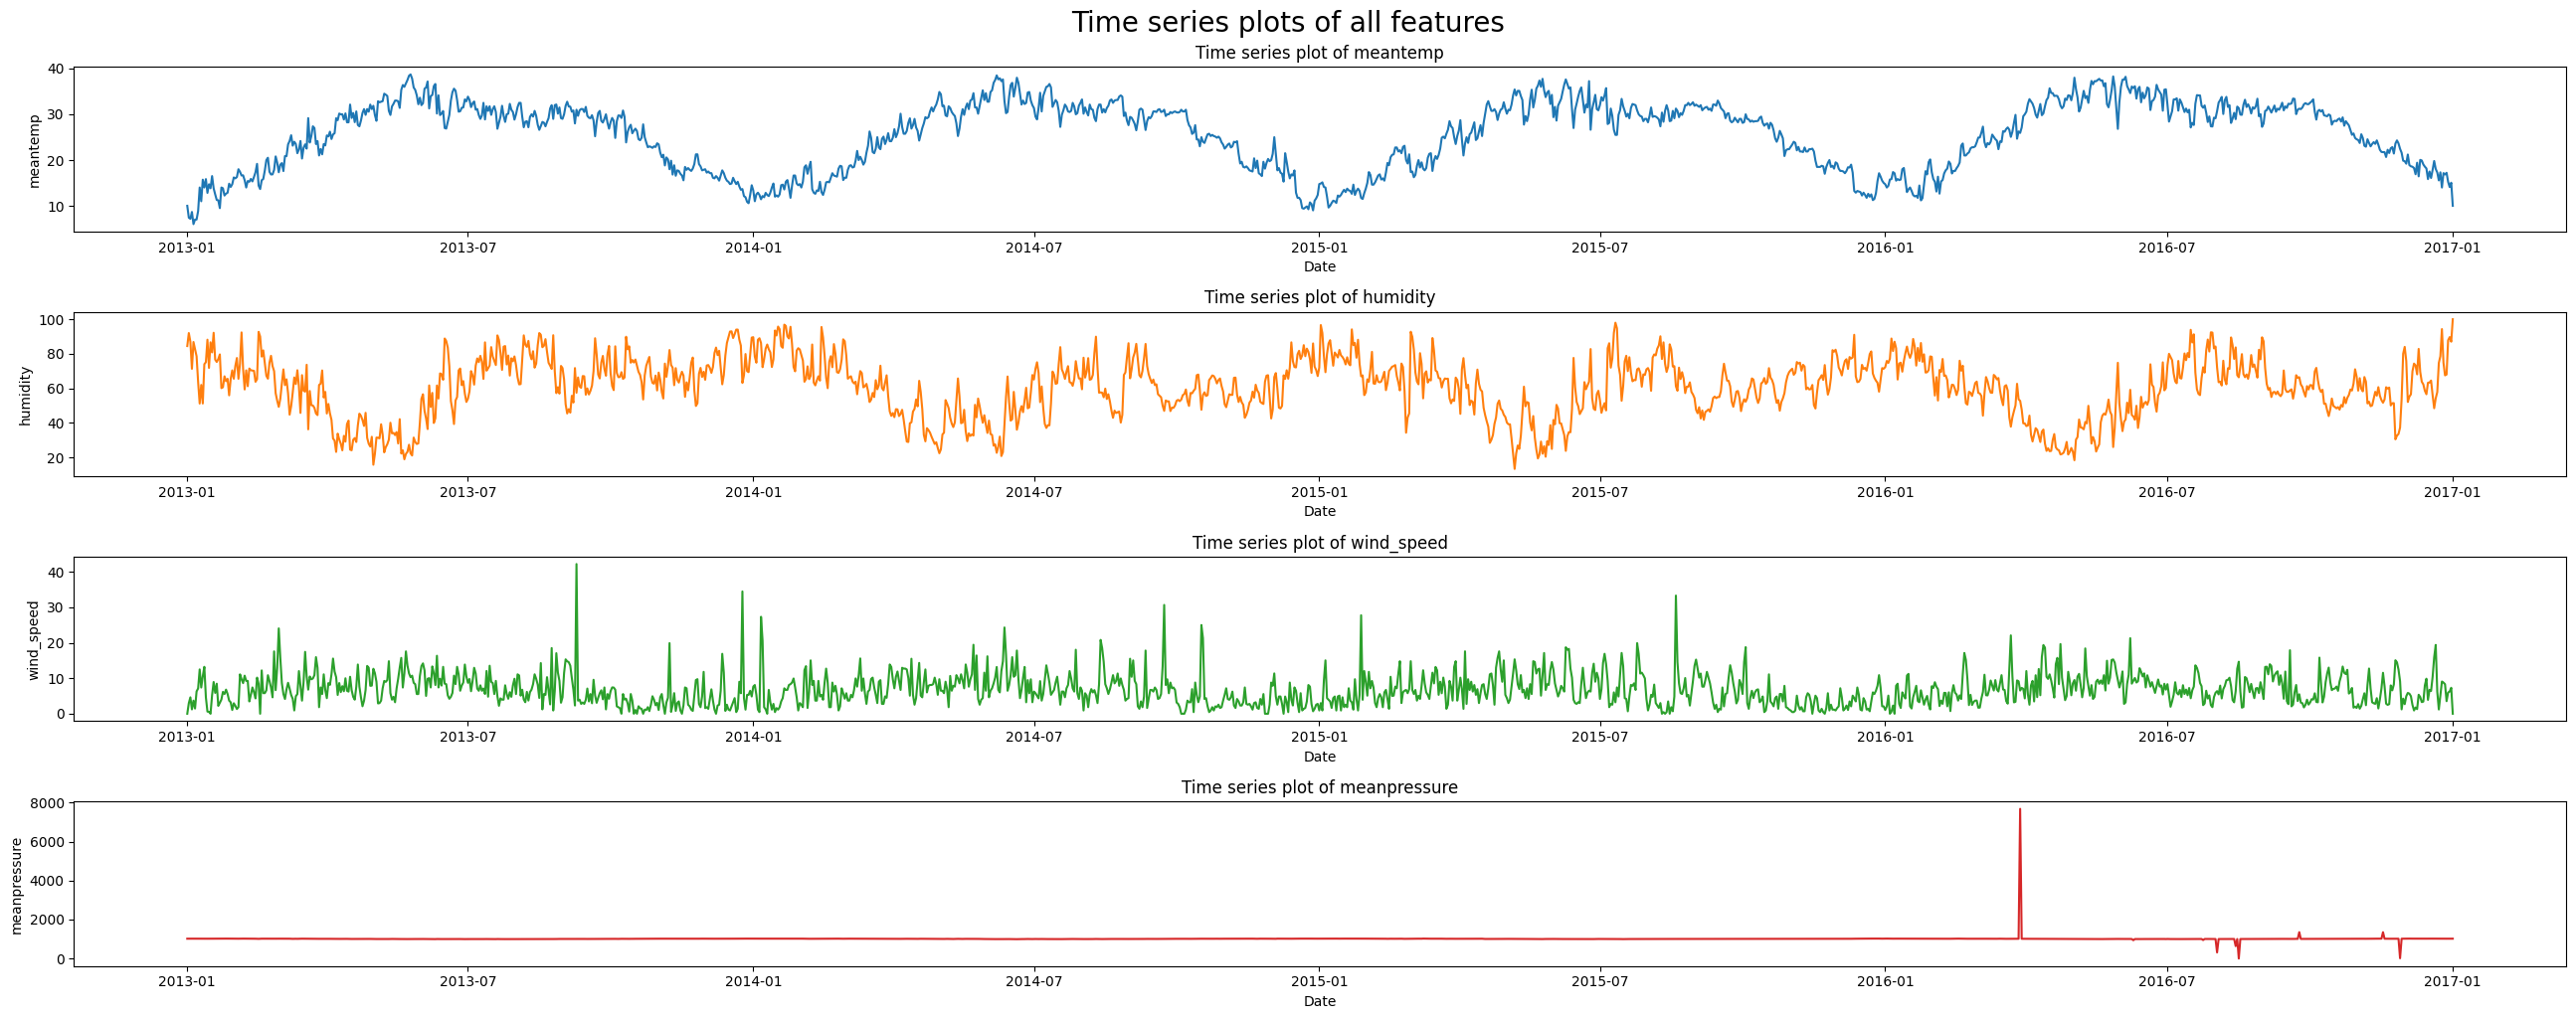

In [4]:
# plotting the time series for all the features

plt.figure(figsize=(26, 10))

for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 1, i)
    plt.plot(df.index, df[col], label=col, color=sns.color_palette()[i - 1])
    plt.title(f"Time series plot of {col}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle("Time series plots of all features", fontsize=20, y=1.02)
plt.show()

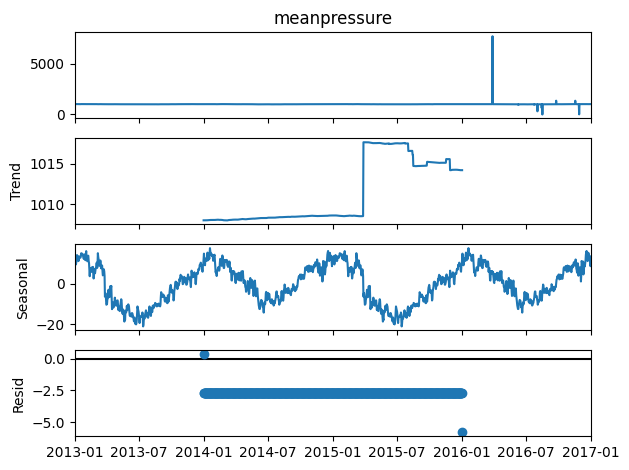

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

mean_temp = seasonal_decompose(df["meantemp"], model="additive", period=182)
humid_ity = seasonal_decompose(df["humidity"], model="additive", period=731)
windspeed = seasonal_decompose(df["wind_speed"], model="additive", period=731)
mean_pressure = seasonal_decompose(df["meanpressure"], model="additive", period=731)
mean_pressure.plot()
plt.show()

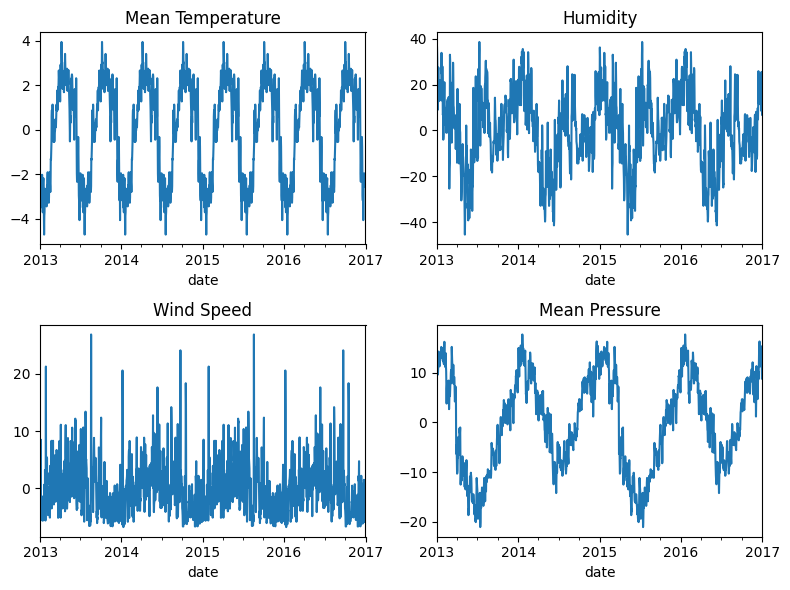

In [6]:

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
mean_temp.seasonal.plot()
plt.title("Mean Temperature")

plt.subplot(2, 2, 2)
humid_ity.seasonal.plot()
plt.title("Humidity")

plt.subplot(2, 2, 3)
windspeed.seasonal.plot()
plt.title("Wind Speed")

plt.subplot(2, 2, 4)
mean_pressure.seasonal.plot()
plt.title("Mean Pressure")

plt.tight_layout()
plt.show()


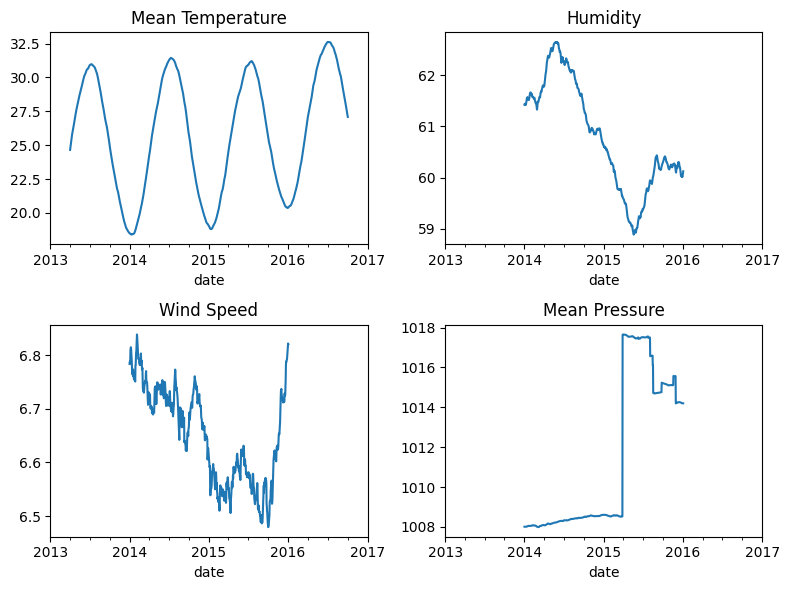

In [7]:

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
mean_temp.trend.plot()
plt.title("Mean Temperature")

plt.subplot(2, 2, 2)
humid_ity.trend.plot()
plt.title("Humidity")

plt.subplot(2, 2, 3)
windspeed.trend.plot()
plt.title("Wind Speed")

plt.subplot(2, 2, 4)
mean_pressure.trend.plot()
plt.title("Mean Pressure")

plt.tight_layout()
plt.show()


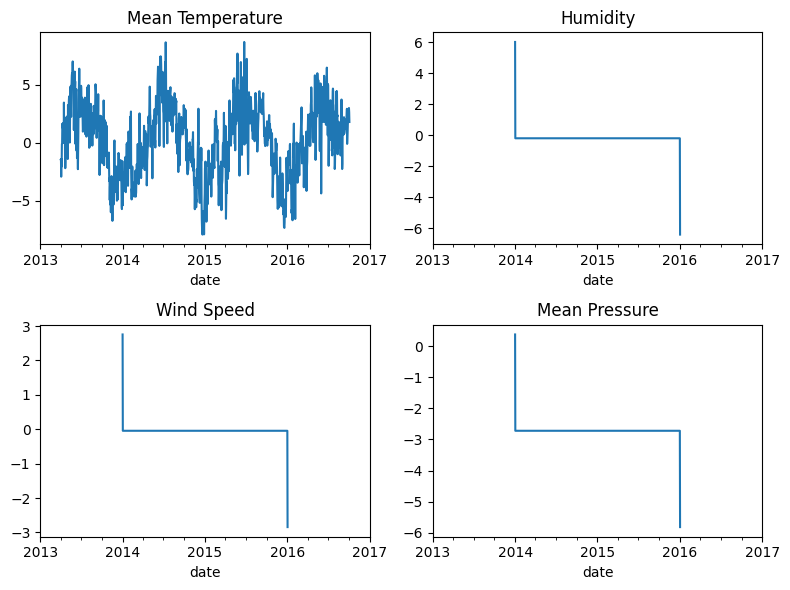

In [8]:

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
mean_temp.resid.plot()
plt.title("Mean Temperature")

plt.subplot(2, 2, 2)
humid_ity.resid.plot()
plt.title("Humidity")

plt.subplot(2, 2, 3)
windspeed.resid.plot()
plt.title("Wind Speed")

plt.subplot(2, 2, 4)
mean_pressure.resid.plot()
plt.title("Mean Pressure")

plt.tight_layout()
plt.show()


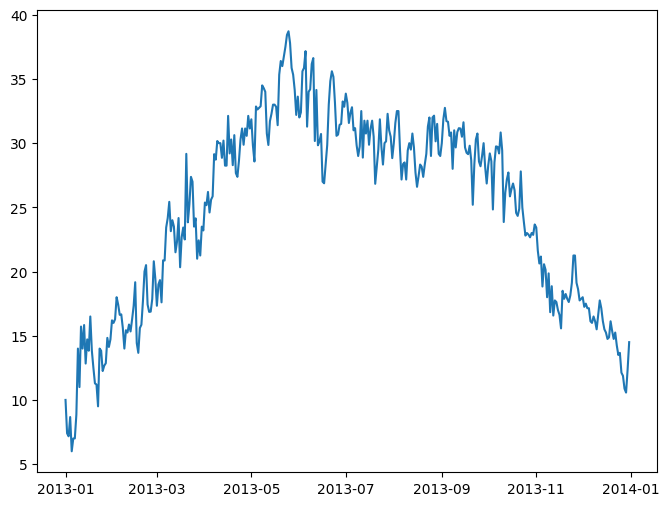

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(df["meantemp"][:365], label="Mean Temperature", color=sns.color_palette()[0])
plt.show()

<Axes: xlabel='date'>

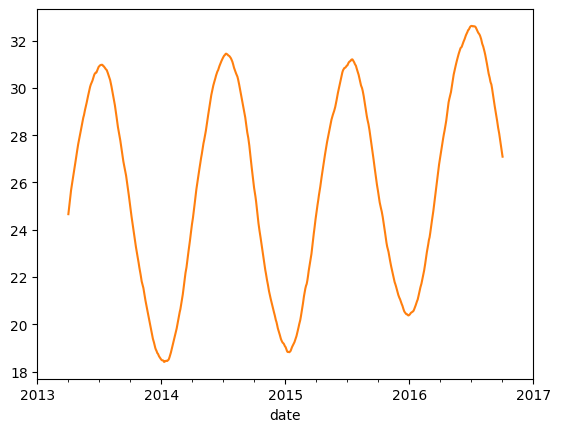

In [10]:
mean_temp.trend.plot(label="Mean Temperature Trend", color=sns.color_palette()[1])
# plt.title("Mean Temperature Residuals")

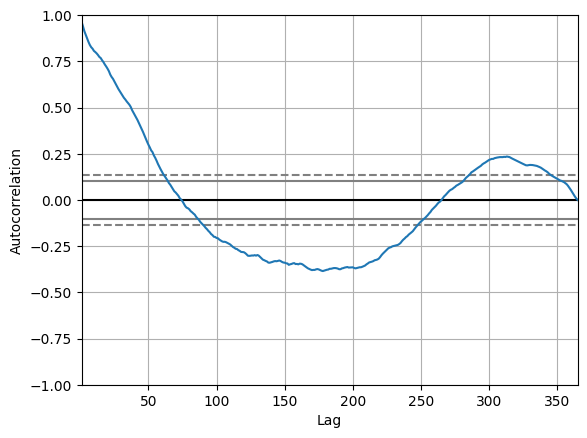

In [11]:
plot_acf = pd.plotting.autocorrelation_plot(df["meantemp"][:365])
plt.show()